# Lecture 1: Basic Python


![Python](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)

## Zhentao Shi

### Basics

-  Binary arithmetic operations `+`, `-`, `*` and `/` are performed element by element.
-  Arithmetic operators: exponends are expressed with `**`, and `%` is the reminder.

### Array and Matrix

* Python was not originally designed for scientific computing.

* To work with arrays and matrices, we need the package `numpy`

In [1]:
#Import the NumPy library
import numpy as np

## Assignment

In [2]:
a = 1; a

1

In [3]:
b=2; b

2

In [4]:
f = a+b; f

3

In [5]:
d = np.log(f); d

1.0986122886681098

In [6]:
e = np.sqrt(d); e

1.048147073968205

In [7]:
print("e = ", e)

e =  1.048147073968205


Python is case sensitive. 

In [8]:
F = "an uppercase letter"
print( "F is", F, "but f = ", f)

F is an uppercase letter but f =  3


### Vectors

In [9]:
a = [1,2,3,4]; a

[1, 2, 3, 4]

Notice Py's default operation of `+` on list

In [10]:
a+ [1,2]

[1, 2, 3, 4, 1, 2]

In [11]:
b = np.array([1,2,3,4]); b

array([1, 2, 3, 4])

In [12]:
np.array([1,2]).shape

(2,)

In [13]:
np.array([[1,2]]).shape

(1, 2)

Logical values

In [14]:
True and True

True

In [15]:
True or False

True

In [16]:
logi1 = np.array([True, True, False]); logi1

array([ True,  True, False])

In [17]:
logi2 = np.array([False, True, True]); logi2

array([False,  True,  True])

In [18]:
logi1 & logi2

array([False,  True, False])

In [19]:
logi1 | logi2

array([ True,  True,  True])

In [20]:
logi1 != logi2

array([ True, False,  True])

In [21]:
try:
    np.sqrt(-1)  # doesn't work
except ValueError as e:
    print(f"Error: {e}")

<positron-console-cell-21>:2: RuntimeWarning: invalid value encountered in sqrt


In [22]:
a = '18'; a

'18'

In [23]:
a = int(a); a

18

In [24]:
af = float(a); af

18.0

#### Example

In [25]:
# Create an array
A = np.array([[1,2,3],[4,5,6]])


In [26]:
A.shape

(2, 3)

In [27]:
B = np.matrix([[1,2,3],[4,5,6]])
A + B

matrix([[ 2,  4,  6],
        [ 8, 10, 12]])

In [28]:
# Create a matrix (2-dimensional array)
M = np.matrix([[1,2],[3,4]])
M

matrix([[1, 2],
        [3, 4]])

## Key Differences Between Python and R

* Python is row-major, while R is column-major.
* The indexing of Python is 0-based, while that of R is 1-based.

In [29]:
D = np.array([1,2,3,4,5,6]).reshape(2,3)
print(D)

[[1 2 3]
 [4 5 6]]


In [30]:
try:
    print(D + [1, 2])  # doesn't work
except ValueError as e:
    print(f"Error: {e}")


Error: operands could not be broadcast together with shapes (2,3) (2,) 


In [31]:
D + [[1],[2]] # broadcasting

array([[2, 3, 4],
       [6, 7, 8]])

In [32]:
F = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g']
print(F)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g']


In [33]:
F[2:5]

['c', 'd', 'e']

In [34]:
# the index rule in Python is more stringent.
D[0] # the first row

array([1, 2, 3])

In [35]:
D[0,:]

array([1, 2, 3])

In [36]:
D[:,0]

array([1, 4])

In [37]:
D[1,2]

6

In [38]:
# Matrix multiplication
result_mult = np.dot(A, D.T)
print(result_mult)

[[14 32]
 [32 77]]


In [39]:
A @ D.T

array([[14, 32],
       [32, 77]])

In [40]:
A * D

array([[ 1,  4,  9],
       [16, 25, 36]])

In [41]:
# Matrix inverse
inverse_M = np.linalg.inv(M)
print(inverse_M)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [42]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(M)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(A)
print("U matrix:\n", U)
print("Singular values:\n", S)
print("V matrix:\n", V)

Eigenvalues:
 [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
U matrix:
 [[-0.3863177   0.92236578]
 [-0.92236578 -0.3863177 ]]
Singular values:
 [9.508032   0.77286964]
V matrix:
 [[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


For further readings, please find a list of basic commands in the documentation of NumPy: 
https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

### OLS-Example
OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$\hat{\beta} = (X' X)^{-1} X'y.$
To conduct OLS estimation in Python, we literally translate the mathematical expression into code.

__Step 1__: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [43]:
np.random.seed(111) # can be removed to allow the result to change
# set the parameters
n = 10
b0 = np.matrix([ [1],[2] ] )
# generate the data
e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 1))))
y = np.dot(X, b0) + e

__Step 2:__ translate the formula to code

In [44]:
# OLS estimator
bhat = np.linalg.inv(X.T @ X) @ X.T @ y
print(bhat)

[[0.70196221]
 [1.45163505]]


__Step 3 (additional):__ plot the regression graph with the scatter points and the regression line.
Further compare the regression line (black) with the true coefficient line (red).

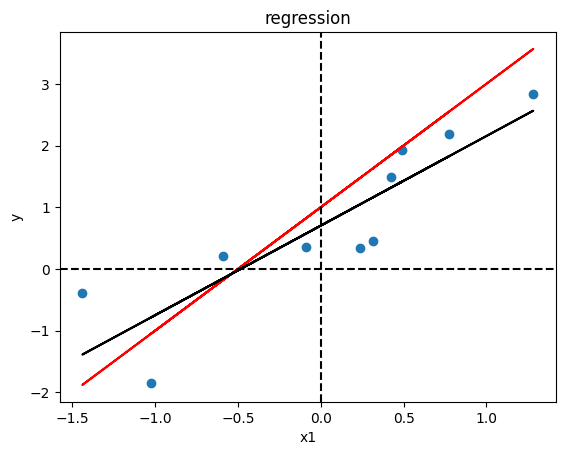

In [45]:
# Import MathPlotLib
import matplotlib.pyplot as plt
X1 = X[:, 1]
plt.plot(X1, y, 'o')
plt.plot(X1, X @ b0, color='red', linestyle='-')
plt.plot(X1, X @ bhat, color='black', linestyle='-')
plt.title('regression')
plt.xlabel('x1')
plt.ylabel('y')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.axvline(0, color = 'black', linestyle = 'dashed')
plt.show()

__Step 4:__ In econometrics we are often interested in hypothesis testing.

The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.

In [46]:
# Import Math

# Calculate the t-value
bhat2 = bhat.item(1) # item( ) is a new function I learn today

e_hat = y - np.dot(X, bhat)
sigma_hat_square = np.dot(e_hat.T, e_hat).item(0) / (n-2)

Sigma_B = np.linalg.inv(np.dot(X.T, X)) * sigma_hat_square
t_value_2 = (bhat2 - b0[1, 0]) / np.sqrt(Sigma_B[1, 1])
print(t_value_2)

-1.9988929992798148


### Modules

* Python has numerous useful modules. 
* Install the targeted modules into the environment.



### Input and Output

To read and write csv files in Python, use the pandas library.
`!pip install module_name`

#### Example:

In [47]:
import pandas as pd
sample_data = pd.read_csv('data_example/AJR.csv')
sample_data.head()

,shortnam,logpgp95,loghjypl,avexpr,lat_abst,logem4,malfal94,yellow,leb95,imr95,meantemp,lt100km,euro1900,democ1,cons1,democ00a,cons00a
0,AGO,7.770645,-3.411248,5.363636,0.136667,5.634789,0.95000,1,46.49,125.0,22.94133,0.118758,8.0,0.0,3.0,0.0,1.0
1,ARG,9.133459,-0.872274,6.386364,0.377778,4.232656,0.00000,0,72.89,21.8,17.10000,0.123089,60.0,1.0,1.0,3.0,3.0
2,AUS,9.897972,-0.170788,9.318182,0.300000,2.145931,0.00000,1,78.25,5.6,20.90000,0.198958,98.0,10.0,7.0,10.0,7.0
3,BFA,6.845880,-3.540459,4.454545,0.144445,5.634789,0.95000,1,44.39,98.8,28.10000,0.000000,0.0,0.0,3.0,0.0,1.0
4,BGD,6.877296,-2.063568,5.136364,0.266667,4.268438,0.12008,1,58.13,78.8,25.68621,0.401598,0.0,8.0,7.0,0.0,1.0


In [48]:
sample_data = sample_data.dropna()

# write the sample_data to a csv file
sample_data.to_csv('data_example/AJR_from_py.csv', index = False)


### Statistics

* The module `SciPy` is for statistics. 
* Commonly used probability distributions in `SciPy.stats`


##### Example:

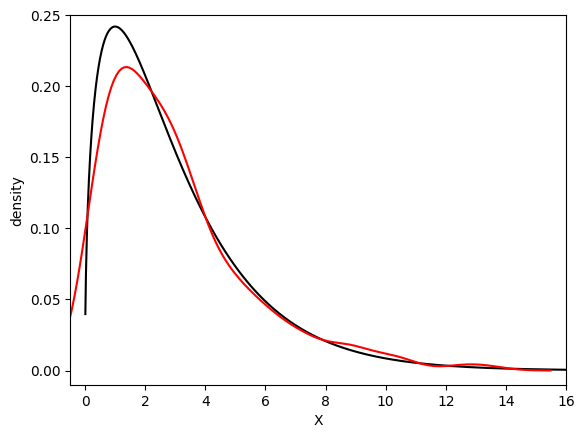

In [49]:
import seaborn as sns # for kernel density function
from scipy import stats
import matplotlib.pyplot as plt


x = np.linspace(0.01, 16, num = 1600)
y = stats.chi2.pdf(x, 3)
z = stats.chi2.rvs(3, size = 1000) # z is randomly generated

plt.plot(x, y, linestyle = '-', color = 'black')
sns.kdeplot(z, color = 'red') # kernel density
plt.xlim(-0.5, 16)
plt.ylim(-0.01, 0.25)
plt.xlabel('X')
plt.ylabel('density')
plt.show()

In [50]:
crit = stats.chi2.ppf(q = 0.95, df = 3)
print(len([i for i in z if i > crit]) / len(z))

0.055


### User-defined function

The format of a user-defined function in Python is

```            
def function_name(input):

    expressions 
    
    return output
```

##### Example:

If the central limit theorem is applicable, then
we can calculate the 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.
It is an easy job.

In [51]:
# construct confidence interval

def CI(x):
    #x is a vector of random variables
    n = len(x)
    mu = np.mean(x)
    sig = np.std(x)
    upper = mu + 1.96 / np.sqrt(n) * sig
    lower = mu - 1.96 / np.sqrt(n) * sig
    return {'lower': lower, 'upper': upper}

### Flow Control

* `if` is used for choice
* `for` or `while` is used for loops.

**Example**

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.


In [52]:
from scipy import stats

Rep = 1000
sample_size = 100
capture = [0] * Rep

for i in range(Rep):
    mu = 2
    x = stats.poisson.rvs(mu, size = sample_size)
    bounds = CI(x)
    if (bounds['lower'] <= mu and mu <= bounds['upper']):
        capture[i] = 1
    

print(np.mean(capture))

0.941


### Statistical Model

* Statistical models are formulated as `y~x`
* In the package `scikit-learn`, we run OLS using `LinearRegression()`

In [53]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
T = 30
p = 1
b0 = [[1.], [2.]]

# Generate data
x = stats.norm.rvs(size=[T, p])
x = sm.add_constant(x)  # Add intercept
y = x @ b0 + stats.norm.rvs(size=[T, 1])


In [54]:
# Linear model
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     106.8
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           4.65e-11
Time:                        22:19:49   Log-Likelihood:                -44.561
No. Observations:                  30   AIC:                             93.12
Df Residuals:                      28   BIC:                             95.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9800      0.203      4.833      0.0

## Display

* `result` object is a list containing the regression results. 
  * Estimated coefficients, 
  * t-stat
  * F-stat
  * R-sqaured.

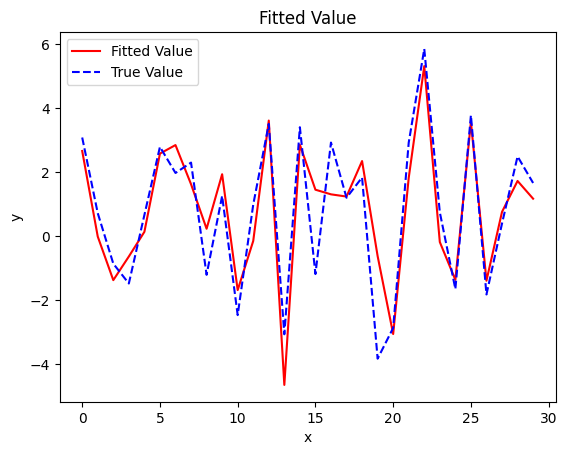

In [55]:
plt.plot(results.fittedvalues, color = 'red', label = 'Fitted Value')
plt.plot(y, color = 'blue', linestyle = 'dashed', label = 'True Value')
plt.title('Fitted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()